## Ensemble Models

In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.utils import to_categorical

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import OneHotEncoder
from itertools import cycle

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error


import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout

In [ ]:
# Connecting to Google drive for importing datasets.
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#Importing the data
store_1 = pd.read_csv("/content/drive/MyDrive/CECS551_dataset_01/store_features/store_01.csv")
store_2 = pd.read_excel("/content/drive/MyDrive/CECS551_dataset_01/store_features/store_02.csv") #The data is formated as excel sheet but stored as csv extension.
store_3 = pd.read_excel("/content/drive/MyDrive/CECS551_dataset_01/store_features/store_03.xlsx")
store_4 = pd.read_excel("/content/drive/MyDrive/CECS551_dataset_01/store_features/store_04.xlsx")
store_5 = pd.read_excel("/content/drive/MyDrive/CECS551_dataset_01/store_features/store_05.xlsx")
store_6 = pd.read_excel("/content/drive/MyDrive/CECS551_dataset_01/store_features/store_06.xlsx")
store_7 = pd.read_excel("/content/drive/MyDrive/CECS551_dataset_01/store_features/store_07.xlsx")
store_8 = pd.read_excel("/content/drive/MyDrive/CECS551_dataset_01/store_features/store_08.xlsx")
store_9 = pd.read_excel("/content/drive/MyDrive/CECS551_dataset_01/store_features/store_09.xlsx")
store_10 = pd.read_excel("/content/drive/MyDrive/CECS551_dataset_01/store_features/store_10.xlsx")
store_11_35 = pd.read_excel("/content/drive/MyDrive/CECS551_dataset_01/store_features/store_11_35.xlsx")

#Importing store type
stores = pd.read_csv("/content/drive/MyDrive/CECS551_dataset_01/stores.csv")


In [ ]:
#changing Store 1 date format to make it consistent with the data
store_1['Date'] = pd.to_datetime(store_1['Date'], format='%m/%d/%Y').dt.strftime('%Y/%m/%d')

#concatinating all the stores together
features = pd.concat([store_1,store_2,store_3,store_4,store_5,store_6,store_7,store_8,store_9,store_10, store_11_35])

# Final dataset contating all the stores' features and store types
stores_data = pd.merge(stores, features[['Store','Date','Unemployment','gas_price','Temperature','CPI','discount_promotional','discount_clearance','discount_damaged_good','discount_competitive']])

#Finding NaN values in Discount columns.
markdowns = ['discount_clearance','discount_promotional','discount_damaged_good', 'discount_competitive']
for column_name in markdowns:
    markdown_frac = features[column_name].isnull().sum() / features[column_name].shape[0]
    print(f"{int(100 * round(markdown_frac, 2))}% of {column_name} values are NaN.")

#Handling missing values
stores_data.fillna(stores_data.mean())

61% of discount_clearance values are NaN.
49% of discount_promotional values are NaN.
53% of discount_damaged_good values are NaN.
52% of discount_competitive values are NaN.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


,Store,Type,Size,Date,Unemployment,gas_price,Temperature,CPI,discount_promotional,discount_clearance,discount_damaged_good,discount_competitive
0,1,A,151315,2010/02/05,6.833000,3.360,59.33,223.659114,9667.50,268.29,0.60000,8368.15
1,1,A,151315,2010/02/12,6.833000,3.409,51.65,223.753643,8687.47,1594.87,2.20000,2144.87
2,1,A,151315,2010/02/19,6.833000,3.510,52.39,223.917015,2706.87,3128.74,1.88000,2396.68
3,1,A,151315,2010/02/26,6.833000,3.555,60.12,224.132020,6129.28,1802.84,1946.11564,301.48
4,1,A,151315,2010/03/05,6.833000,3.630,61.65,224.347025,3552.58,601.32,1946.11564,2666.22
...,...,...,...,...,...,...,...,...,...,...,...,...
6365,35,B,103681,2013-06-28 00:00:00,7.759505,3.639,77.34,171.388623,4764.55,85.65,1946.11564,4660.01
6366,35,B,103681,2013-07-05 00:00:00,7.759505,3.614,77.41,171.388623,6333.87,138.09,610.35000,7224.45
6367,35,B,103681,2013-07-12 00:00:00,7.759505,3.614,80.74,171.388623,4798.18,130.88,22.05000,2351.60
6368,35,B,103681,2013-07-19 00:00:00,7.759505,3.737,83.36,171.388623,2318.53,122.30,23.45000,771.35


In [ ]:
#Sprint2
# Enconding the target variable as it is a categorical feature with types A, B and C
target = 'Type'
labelencoder = LabelEncoder()
stores_data['Type'] = labelencoder.fit_transform(stores_data['Type'])

#Selecting target variable
y = stores_data[target]
X = stores_data.drop(columns=[target, "Date"])

# Handling missing values
X = X.fillna(stores_data.mean())
y = y.fillna(y.mode()[0])

#applying SMOTE for imbalance
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

#Train test splitting[80/20]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)

type(y_test)

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = y_test.values.reshape(len(y_test), 1)
y_test = onehot_encoder.fit_transform(integer_encoded).astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  if sys.path[0] == '':


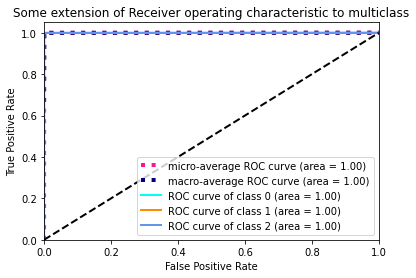

In [ ]:
# KNN Classifier

# Define and train classifier
knn = KNeighborsClassifier(3)
knn.fit(X_train, y_train)

# Make prediction
y_pred = knn.predict(X_test)

integer_encoded = y_pred.reshape(len(y_pred), 1)
y_pred = onehot_encoder.fit_transform(integer_encoded).astype(int)

#ROC Curve

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

lw = 2

# First aggregate all false positive rates
n_classes = 3
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

In [ ]:
knn_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % knn_accuracy)
knn_precision = precision_score(y_test, y_pred, average='micro')
print('Precision: %f' % knn_precision)
knn_recall = recall_score(y_test, y_pred, average='micro')
print('Recall: %f' % knn_recall)
knn_f1 = f1_score(y_test, y_pred, average='micro')
print('F1 score: %f' % knn_f1)

Accuracy: 0.999491
Precision: 0.999491
Recall: 0.999491
F1 score: 0.999491


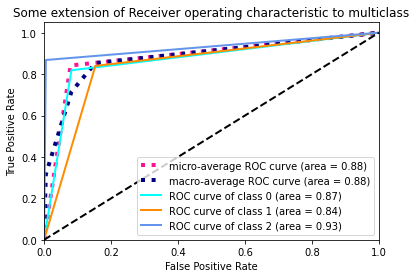

In [ ]:
# Multi Layer Perceptron classifier

mlp = MLPClassifier(alpha=1, max_iter=1000)
mlp.fit(X_train, y_train)

# Make predictions
y_pred = mlp.predict(X_test)

integer_encoded = y_pred.reshape(len(y_pred), 1)
y_pred = onehot_encoder.fit_transform(integer_encoded).astype(int)

#ROC Curve

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

lw = 2

# First aggregate all false positive rates
n_classes = 3
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

In [ ]:
mlp_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % mlp_accuracy)
mlp_precision = precision_score(y_test, y_pred, average='micro')
print('Precision: %f' % mlp_precision)
mlp_recall = recall_score(y_test, y_pred, average='micro')
print('Recall: %f' % mlp_recall)
mlp_f1 = f1_score(y_test, y_pred, average='micro')
print('F1 score: %f' % mlp_f1)

Accuracy: 0.841811
Precision: 0.841811
Recall: 0.841811
F1 score: 0.841811


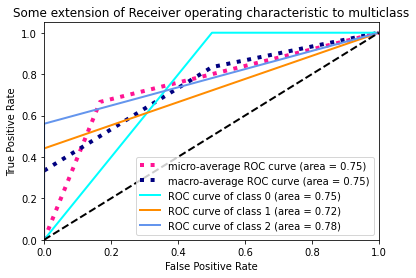

In [ ]:
#Support Vector classifier

svc = SVC(gamma=1, C=1)
svc.fit(X_train, y_train)

# Make predictions
y_pred = svc.predict(X_test)

integer_encoded = y_pred.reshape(len(y_pred), 1)
y_pred = onehot_encoder.fit_transform(integer_encoded).astype(int)

#ROC Curve

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

lw = 2

# First aggregate all false positive rates
n_classes = 3
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

In [ ]:
svc_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % svc_accuracy)
svc_precision = precision_score(y_test, y_pred, average='micro')
print('Precision: %f' % svc_precision)
svc_recall = recall_score(y_test, y_pred, average='micro')
print('Recall: %f' % svc_recall)
svc_f1 = f1_score(y_test, y_pred, average='micro')
print('F1 score: %f' % svc_f1)

Accuracy: 0.665819
Precision: 0.665819
Recall: 0.665819
F1 score: 0.665819


In [ ]:
# Averaging ensemble method

from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.linear_model import LinearRegression

pred_1 = knn.predict(X_test)
pred_2 = svc.predict(X_test)
pred_3 = mlp.predict(X_test)

# final prediction after averaging on the prediction of all 3 models
pred_final = (pred_1+pred_2+pred_3)/3.0

# printing the mean squared error between real value and predicted value
inv_y_test = onehot_encoder.inverse_transform(y_test).ravel()
print(mean_squared_error(inv_y_test, pred_final))



0.13230473606872387


In [ ]:
# Weighted average ensemble method

pred_1 = knn.predict(X_test)
pred_2 = svc.predict(X_test)
pred_3 = mlp.predict(X_test)

# final prediction after averaging on the prediction of all 3 models
pred_final = (pred_1*0.3+pred_2*0.3+pred_3*0.4)

# printing the mean squared error between real value and predicted value
inv_y_test = onehot_encoder.inverse_transform(y_test).ravel()
print(mean_squared_error(inv_y_test, pred_final))

0.12677009155645982


In [ ]:
# Voting ensemble method

from sklearn.ensemble import VotingClassifier

model = VotingClassifier(estimators=[('knn', knn), ('svm_rbf', svc), ('mlp', svc)], voting='hard')
model.fit(X_train,y_train)
# Make predictions
y_pred = mlp.predict(X_test)

integer_encoded = y_pred.reshape(len(y_pred), 1)
y_pred = onehot_encoder.fit_transform(integer_encoded).astype(int)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test, y_pred, average='micro')
print('Precision: %f' % precision)
recall = recall_score(y_test, y_pred, average='micro')
print('Recall: %f' % recall)
f1 = f1_score(y_test, y_pred, average='micro')
print('F1 score: %f' % f1)


Accuracy: 0.841811
Precision: 0.841811
Recall: 0.841811
F1 score: 0.841811


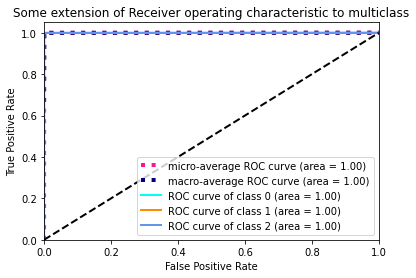

In [ ]:
#Stacking the classifiers

import xgboost as xgb

# Define estimators
estimator_list = [
    ('knn',knn),
    ('svc',svc),
    ('mlp',mlp) ]


# Build stack model
stack_model = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression()
)

# Train stacked model
stack_model.fit(X_train, y_train)

# Make prediction
y_pred = stack_model.predict(X_test)

integer_encoded = y_pred.reshape(len(y_pred), 1)
y_pred = onehot_encoder.fit_transform(integer_encoded).astype(int)

#ROC Curve

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

lw = 2

# First aggregate all false positive rates
n_classes = 3
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

In [ ]:
stack_model_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % stack_model_accuracy)
stack_model_precision = precision_score(y_test, y_pred, average='micro')
print('Precision: %f' % stack_model_precision)
stack_model_recall = recall_score(y_test, y_pred, average='micro')
print('Recall: %f' % stack_model_recall)
stack_model_f1 = f1_score(y_test, y_pred, average='micro')
print('F1 score: %f' % stack_model_f1)

Accuracy: 0.999491
Precision: 0.999491
Recall: 0.999491
F1 score: 0.999491


In [ ]:
acc_test_list = {'knn':knn_accuracy,
'svm_rbf': svc_accuracy,
'mlp': mlp_accuracy,
'stack': stack_model_accuracy}


f1_test_list = {'knn':knn_f1,
'svm_rbf': svc_f1,
'mlp': mlp_f1,
'stack': stack_model_f1}

precision_test_list = {'knn':knn_precision,
'svm_rbf': svc_precision,
'mlp': mlp_precision,
'stack': stack_model_precision}

recall_test_list = {'knn':knn_recall,
'svm_rbf': svc_recall,
'mlp': mlp_recall,
'stack': stack_model_recall}


In [ ]:
import pandas as pd

acc_df = pd.DataFrame.from_dict(acc_test_list, orient='index', columns=['Accuracy'])
f1_df = pd.DataFrame.from_dict(f1_test_list, orient='index', columns=['F1'])
precision_df = pd.DataFrame.from_dict(f1_test_list, orient='index', columns=['Precision'])
recall_df = pd.DataFrame.from_dict(f1_test_list, orient='index', columns=['Recall'])
performance_metrics = pd.concat([acc_df, f1_df, precision_df, recall_df], axis=1)
performance_metrics

,Accuracy,F1,Precision,Recall
knn,0.999491,0.999491,0.999491,0.999491
svm_rbf,0.665819,0.665819,0.665819,0.665819
mlp,0.841811,0.841811,0.841811,0.841811
stack,0.999491,0.999491,0.999491,0.999491


## RNN

In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.utils import to_categorical

import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout

In [ ]:
# Connecting to Google drive for importing datasets.
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#Importing the data
store_1 = pd.read_csv("/content/drive/MyDrive/CECS551_dataset_01/store_features/store_01.csv")
store_2 = pd.read_excel("/content/drive/MyDrive/CECS551_dataset_01/store_features/store_02.csv") #The data is formated as excel sheet but stored as csv extension.
store_3 = pd.read_excel("/content/drive/MyDrive/CECS551_dataset_01/store_features/store_03.xlsx")
store_4 = pd.read_excel("/content/drive/MyDrive/CECS551_dataset_01/store_features/store_04.xlsx")
store_5 = pd.read_excel("/content/drive/MyDrive/CECS551_dataset_01/store_features/store_05.xlsx")
store_6 = pd.read_excel("/content/drive/MyDrive/CECS551_dataset_01/store_features/store_06.xlsx")
store_7 = pd.read_excel("/content/drive/MyDrive/CECS551_dataset_01/store_features/store_07.xlsx")
store_8 = pd.read_excel("/content/drive/MyDrive/CECS551_dataset_01/store_features/store_08.xlsx")
store_9 = pd.read_excel("/content/drive/MyDrive/CECS551_dataset_01/store_features/store_09.xlsx")
store_10 = pd.read_excel("/content/drive/MyDrive/CECS551_dataset_01/store_features/store_10.xlsx")
store_11_35 = pd.read_excel("/content/drive/MyDrive/CECS551_dataset_01/store_features/store_11_35.xlsx")

#Importing store type
stores = pd.read_csv("/content/drive/MyDrive/CECS551_dataset_01/stores.csv")


In [ ]:
#changing Store 1 date format to make it consistent with the data
store_1['Date'] = pd.to_datetime(store_1['Date'], format='%m/%d/%Y').dt.strftime('%Y/%m/%d')

#concatinating all the stores together
features = pd.concat([store_1,store_2,store_3,store_4,store_5,store_6,store_7,store_8,store_9,store_10, store_11_35])

# Final dataset contating all the stores' features and store types
stores_data = pd.merge(stores, features[['Store','Date','Unemployment','gas_price','Temperature','CPI','discount_promotional','discount_clearance','discount_damaged_good','discount_competitive']])

#Finding NaN values in Discount columns.
markdowns = ['discount_clearance','discount_promotional','discount_damaged_good', 'discount_competitive']
for column_name in markdowns:
    markdown_frac = features[column_name].isnull().sum() / features[column_name].shape[0]
    print(f"{int(100 * round(markdown_frac, 2))}% of {column_name} values are NaN.")

#Handling missing values
stores_data.fillna(stores_data.mean())

61% of discount_clearance values are NaN.
49% of discount_promotional values are NaN.
53% of discount_damaged_good values are NaN.
52% of discount_competitive values are NaN.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


,Store,Type,Size,Date,Unemployment,gas_price,Temperature,CPI,discount_promotional,discount_clearance,discount_damaged_good,discount_competitive
0,1,A,151315,2010/02/05,6.833000,3.360,59.33,223.659114,9667.50,268.29,0.60000,8368.15
1,1,A,151315,2010/02/12,6.833000,3.409,51.65,223.753643,8687.47,1594.87,2.20000,2144.87
2,1,A,151315,2010/02/19,6.833000,3.510,52.39,223.917015,2706.87,3128.74,1.88000,2396.68
3,1,A,151315,2010/02/26,6.833000,3.555,60.12,224.132020,6129.28,1802.84,1946.11564,301.48
4,1,A,151315,2010/03/05,6.833000,3.630,61.65,224.347025,3552.58,601.32,1946.11564,2666.22
...,...,...,...,...,...,...,...,...,...,...,...,...
6365,35,B,103681,2013-06-28 00:00:00,7.759505,3.639,77.34,171.388623,4764.55,85.65,1946.11564,4660.01
6366,35,B,103681,2013-07-05 00:00:00,7.759505,3.614,77.41,171.388623,6333.87,138.09,610.35000,7224.45
6367,35,B,103681,2013-07-12 00:00:00,7.759505,3.614,80.74,171.388623,4798.18,130.88,22.05000,2351.60
6368,35,B,103681,2013-07-19 00:00:00,7.759505,3.737,83.36,171.388623,2318.53,122.30,23.45000,771.35


In [ ]:
#Sprint2
# Enconding the target variable as it is a categorical feature with types A, B and C
target = 'Type'
labelencoder = LabelEncoder()
stores_data['Type'] = labelencoder.fit_transform(stores_data['Type'])

#Selecting target variable
y = stores_data[target]
X = stores_data.drop(columns=[target, "Date"])

# Handling missing values
X = X.fillna(stores_data.mean())
y = y.fillna(y.mode()[0])

#applying SMOTE for imbalance
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

#Train test splitting[80/20]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = y_test.values.reshape(len(y_test), 1)
y_test = onehot_encoder.fit_transform(integer_encoded).astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  if sys.path[0] == '':


In [ ]:
#imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [ ]:
X_train = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)
y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
y_test = np.asarray(y_test).astype('float32').reshape((-1,1))
y_test = y_test.reshape(1966,3)

In [ ]:
#units = 14
#Declaring a sequential model
rnn4 = Sequential()

#Adding an input layer of 45 units with a dropout value of 0.2
rnn4.add(LSTM(units = 14, return_sequences = True, input_shape = (X_train.shape[1], 1)))
rnn4.add(Dropout(0.2))
#Adding a hidden layers of 45 units with dropout value 0.2
rnn4.add(LSTM(units = 14, return_sequences = True))
rnn4.add(Dropout(0.2))

rnn4.add(LSTM(units = 14, return_sequences = True))
rnn4.add(Dropout(0.2))

rnn4.add(LSTM(units = 14, return_sequences = False))
rnn4.add(Dropout(0.2))

rnn4.add(Flatten())

#Output layer with one unit
rnn4.add(Dense(units = 3, activation='sigmoid'))

#Compiling the sequential model
rnn4.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

#Fitting the rnn model to the dataset
rnn4.fit(X_train, y_train, epochs = 50, batch_size = 128)

Epoch 1/50
62/62 [==============================] - 10s 23ms/step - loss: 1.0939
Epoch 2/50
62/62 [==============================] - 1s 23ms/step - loss: 0.9766
Epoch 3/50
62/62 [==============================] - 2s 25ms/step - loss: 0.8887
Epoch 4/50
62/62 [==============================] - 1s 23ms/step - loss: 0.8530
Epoch 5/50
62/62 [==============================] - 1s 23ms/step - loss: 0.8256
Epoch 6/50
62/62 [==============================] - 1s 23ms/step - loss: 0.8016
Epoch 7/50
62/62 [==============================] - 1s 23ms/step - loss: 0.7834
Epoch 8/50
62/62 [==============================] - 1s 23ms/step - loss: 0.7645
Epoch 9/50
62/62 [==============================] - 1s 23ms/step - loss: 0.7327
Epoch 10/50
62/62 [==============================] - 1s 24ms/step - loss: 0.7291
Epoch 11/50
62/62 [==============================] - 1s 23ms/step - loss: 0.7199
Epoch 12/50
62/62 [==============================] - 2s 28ms/step - loss: 0.7093
Epoch 13/50
62/62 [=================

In [ ]:
y_pred4 = rnn4.predict(X_test)

62/62 [==============================] - 2s 5ms/step


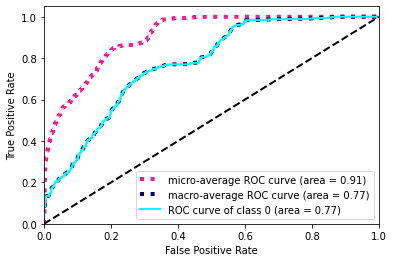

In [ ]:
#ROC Curve
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import OneHotEncoder

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(1):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred4[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred4.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

from itertools import cycle

lw = 2

# First aggregate all false positive rates
n_classes = 1
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

y_pred4=np.argmax(y_pred4, axis=1)
y_test1=np.argmax(y_test, axis=1)

accuracy = accuracy_score(y_test1, y_pred4)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test1, y_pred4, average='micro')
print('Precision: %f' % precision)
recall = recall_score(y_test1, y_pred4, average='micro')
print('Recall: %f' % recall)
f1 = f1_score(y_test1, y_pred4, average='micro')
print('F1 score: %f' % f1)

Accuracy: 0.732452
Precision: 0.732452
Recall: 0.732452
F1 score: 0.732452


In [ ]:
#epochs = 50, units = 45
#Declaring a sequential model
rnn1 = Sequential()

#Adding an input layer of 45 units with a dropout value of 0.2
rnn1.add(LSTM(units = 45, return_sequences = True, input_shape = (X_train.shape[1], 1)))
rnn1.add(Dropout(0.2))

#Adding a hidden layers of 45 units with dropout value 0.2
rnn1.add(LSTM(units = 45, return_sequences = True))
rnn1.add(Dropout(0.2))

rnn1.add(LSTM(units = 45, return_sequences = False))
rnn1.add(Dropout(0.2))

rnn1.add(Flatten())

#Output layer with one unit
rnn1.add(Dense(units = 3, activation='sigmoid'))

#Compiling the sequential model
rnn1.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

#Fitting the rnn model to the dataset
rnn1.fit(X_train, y_train, epochs = 50, batch_size = 128)

Epoch 1/50
62/62 [==============================] - 8s 32ms/step - loss: 1.0069
Epoch 2/50
62/62 [==============================] - 2s 32ms/step - loss: 0.7992
Epoch 3/50
62/62 [==============================] - 2s 32ms/step - loss: 0.7510
Epoch 4/50
62/62 [==============================] - 2s 34ms/step - loss: 0.7323
Epoch 5/50
62/62 [==============================] - 2s 33ms/step - loss: 0.7093
Epoch 6/50
62/62 [==============================] - 2s 33ms/step - loss: 0.6976
Epoch 7/50
62/62 [==============================] - 2s 32ms/step - loss: 0.6851
Epoch 8/50
62/62 [==============================] - 3s 43ms/step - loss: 0.6828
Epoch 9/50
62/62 [==============================] - 3s 52ms/step - loss: 0.6575
Epoch 10/50
62/62 [==============================] - 2s 32ms/step - loss: 0.6340
Epoch 11/50
62/62 [==============================] - 2s 33ms/step - loss: 0.6033
Epoch 12/50
62/62 [==============================] - 2s 32ms/step - loss: 0.5886
Epoch 13/50
62/62 [==================

In [ ]:
#Predicting the store types

y_pred1 = rnn1.predict(X_test)

62/62 [==============================] - 2s 6ms/step


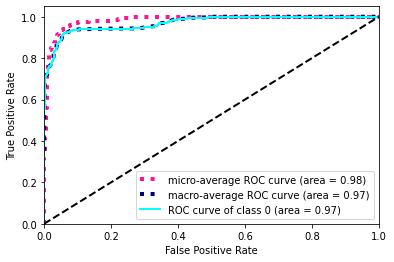

In [ ]:
#ROC Curve
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import OneHotEncoder

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(1):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred1.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

from itertools import cycle

lw = 2

# First aggregate all false positive rates
n_classes = 1
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

y_pred1=np.argmax(y_pred1, axis=1)

accuracy = accuracy_score(y_test1, y_pred1)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test1, y_pred1, average='micro')
print('Precision: %f' % precision)
recall = recall_score(y_test1, y_pred1, average='micro')
print('Recall: %f' % recall)
f1 = f1_score(y_test1, y_pred1, average='micro')
print('F1 score: %f' % f1)

Accuracy: 0.929298
Precision: 0.929298
Recall: 0.929298
F1 score: 0.929298


In [ ]:
#epochs = 100
#Declaring a sequential model
rnn2 = Sequential()

#Adding an input layer of 45 units with a dropout value of 0.2
rnn2.add(LSTM(units = 45, return_sequences = True, input_shape = (X_train.shape[1], 1)))
rnn2.add(Dropout(0.2))

#Adding a hidden layers of 45 units with dropout value 0.2
rnn2.add(LSTM(units = 45, return_sequences = True))
rnn2.add(Dropout(0.2))

rnn2.add(LSTM(units = 45, return_sequences = True))
rnn2.add(Dropout(0.2))

rnn2.add(LSTM(units = 45, return_sequences = False))
rnn2.add(Dropout(0.2))

rnn2.add(Flatten())

#Output layer with one unit
rnn2.add(Dense(units = 3, activation='sigmoid'))

#Compiling the sequential model
rnn2.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

#Fitting the rnn model to the dataset
rnn2.fit(X_train, y_train, epochs = 100, batch_size = 128)

Epoch 1/100
62/62 [==============================] - 10s 43ms/step - loss: 0.9964
Epoch 2/100
62/62 [==============================] - 3s 43ms/step - loss: 0.7745
Epoch 3/100
62/62 [==============================] - 3s 43ms/step - loss: 0.7302
Epoch 4/100
62/62 [==============================] - 3s 44ms/step - loss: 0.7283
Epoch 5/100
62/62 [==============================] - 3s 43ms/step - loss: 0.7056
Epoch 6/100
62/62 [==============================] - 4s 61ms/step - loss: 0.7046
Epoch 7/100
62/62 [==============================] - 3s 55ms/step - loss: 0.6773
Epoch 8/100
62/62 [==============================] - 3s 43ms/step - loss: 0.6763
Epoch 9/100
62/62 [==============================] - 3s 43ms/step - loss: 0.6588
Epoch 10/100
62/62 [==============================] - 3s 42ms/step - loss: 0.6509
Epoch 11/100
62/62 [==============================] - 3s 43ms/step - loss: 0.6283
Epoch 12/100
62/62 [==============================] - 3s 42ms/step - loss: 0.5826
Epoch 13/100
62/62 [====

In [ ]:
#Predicting the store types

y_pred2 = rnn2.predict(X_test)

62/62 [==============================] - 2s 7ms/step


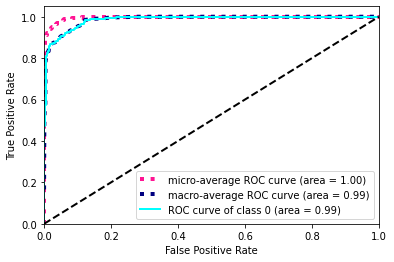

In [ ]:
#ROC Curve
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import OneHotEncoder

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(1):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred2[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred2.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

from itertools import cycle

lw = 2

# First aggregate all false positive rates
n_classes = 1
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )
plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

y_pred2=np.argmax(y_pred2, axis=1)

accuracy = accuracy_score(y_test1, y_pred2)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test1, y_pred2, average='micro')
print('Precision: %f' % precision)
recall = recall_score(y_test1, y_pred2, average='micro')
print('Recall: %f' % recall)
f1 = f1_score(y_test1, y_pred2, average='micro')
print('F1 score: %f' % f1)

Accuracy: 0.959817
Precision: 0.959817
Recall: 0.959817
F1 score: 0.959817


In [ ]:
#epochs = 150
#Declaring a sequential model
rnn3 = Sequential()

#Adding an input layer of 45 units with a dropout value of 0.2
rnn3.add(LSTM(units = 45, return_sequences = True, input_shape = (X_train.shape[1], 1)))
rnn3.add(Dropout(0.2))

#Adding a hidden layers of 45 units with dropout value 0.2
rnn3.add(LSTM(units = 45, return_sequences = True))
rnn3.add(Dropout(0.4))

rnn3.add(LSTM(units = 45, return_sequences = True))
rnn3.add(Dropout(0.4))

rnn3.add(Flatten())

#Output layer with one unit
rnn3.add(Dense(units = 3, activation='sigmoid'))

#Compiling the sequential model
rnn3.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

#Fitting the rnn model to the dataset
rnn3.fit(X_train, y_train, epochs = 150, batch_size = 128)

Epoch 1/150
62/62 [==============================] - 8s 35ms/step - loss: 0.9977
Epoch 2/150
62/62 [==============================] - 2s 34ms/step - loss: 0.7987
Epoch 3/150
62/62 [==============================] - 2s 36ms/step - loss: 0.7321
Epoch 4/150
62/62 [==============================] - 2s 34ms/step - loss: 0.7043
Epoch 5/150
62/62 [==============================] - 2s 34ms/step - loss: 0.6890
Epoch 6/150
62/62 [==============================] - 2s 34ms/step - loss: 0.6768
Epoch 7/150
62/62 [==============================] - 2s 34ms/step - loss: 0.6680
Epoch 8/150
62/62 [==============================] - 2s 34ms/step - loss: 0.6521
Epoch 9/150
62/62 [==============================] - 2s 34ms/step - loss: 0.6272
Epoch 10/150
62/62 [==============================] - 2s 35ms/step - loss: 0.6172
Epoch 11/150
62/62 [==============================] - 2s 34ms/step - loss: 0.5906
Epoch 12/150
62/62 [==============================] - 2s 36ms/step - loss: 0.5612
Epoch 13/150
62/62 [=====

In [ ]:
y_pred3 = rnn3.predict(X_test)

62/62 [==============================] - 2s 6ms/step


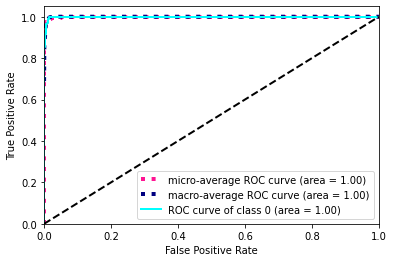

In [ ]:
#ROC Curve
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import OneHotEncoder

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(1):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred3[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred3.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

from itertools import cycle

lw = 2

# First aggregate all false positive rates
n_classes = 1
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

y_pred3=np.argmax(y_pred3, axis=1)

accuracy = accuracy_score(y_test1, y_pred3)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test1, y_pred3, average='micro')
print('Precision: %f' % precision)
recall = recall_score(y_test1, y_pred3, average='micro')
print('Recall: %f' % recall)
f1 = f1_score(y_test1, y_pred3, average='micro')
print('F1 score: %f' % f1)

Accuracy: 0.982197
Precision: 0.982197
Recall: 0.982197
F1 score: 0.982197


## CNN

In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical

import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#Importing the data
store_1 = pd.read_csv("/content/drive/MyDrive/CECS551_dataset_01/store_features/store_01.csv")
store_2 = pd.read_excel("/content/drive/MyDrive/CECS551_dataset_01/store_features/store_02.csv") #The data is formated as excel sheet but stored as csv extension.
store_3 = pd.read_excel("/content/drive/MyDrive/CECS551_dataset_01/store_features/store_03.xlsx")
store_4 = pd.read_excel("/content/drive/MyDrive/CECS551_dataset_01/store_features/store_04.xlsx")
store_5 = pd.read_excel("/content/drive/MyDrive/CECS551_dataset_01/store_features/store_05.xlsx")
store_6 = pd.read_excel("/content/drive/MyDrive/CECS551_dataset_01/store_features/store_06.xlsx")
store_7 = pd.read_excel("/content/drive/MyDrive/CECS551_dataset_01/store_features/store_07.xlsx")
store_8 = pd.read_excel("/content/drive/MyDrive/CECS551_dataset_01/store_features/store_08.xlsx")
store_9 = pd.read_excel("/content/drive/MyDrive/CECS551_dataset_01/store_features/store_09.xlsx")
store_10 = pd.read_excel("/content/drive/MyDrive/CECS551_dataset_01/store_features/store_10.xlsx")
store_11_35 = pd.read_excel("/content/drive/MyDrive/CECS551_dataset_01/store_features/store_11_35.xlsx")


#Importing store type
stores = pd.read_csv("/content/drive/MyDrive/CECS551_dataset_01/stores.csv")


In [ ]:
#changing Store 1 date format to make it consistent with the data
store_1['Date'] = pd.to_datetime(store_1['Date'], format='%m/%d/%Y').dt.strftime('%Y/%m/%d')

#concatinating all the stores together
features = pd.concat([store_1,store_2,store_3,store_4,store_5,store_6,store_7,store_8,store_9,store_10, store_11_35])

# Final dataset contating all the stores' features and store types
stores_data = pd.merge(stores, features[['Store','Date','Unemployment','gas_price','Temperature','CPI','discount_promotional','discount_clearance','discount_damaged_good','discount_competitive']])

#Finding NaN values in Discount columns.
markdowns = ['discount_clearance','discount_promotional','discount_damaged_good', 'discount_competitive']
for column_name in markdowns:
    markdown_frac = features[column_name].isnull().sum() / features[column_name].shape[0]
    print(f"{int(100 * round(markdown_frac, 2))}% of {column_name} values are NaN.")

#Handling missing values
stores_data.fillna(stores_data.mean())

61% of discount_clearance values are NaN.
49% of discount_promotional values are NaN.
53% of discount_damaged_good values are NaN.
52% of discount_competitive values are NaN.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


,Store,Type,Size,Date,Unemployment,gas_price,Temperature,CPI,discount_promotional,discount_clearance,discount_damaged_good,discount_competitive
0,1,A,151315,2010/02/05,6.833000,3.360,59.33,223.659114,9667.50,268.29,0.60000,8368.15
1,1,A,151315,2010/02/12,6.833000,3.409,51.65,223.753643,8687.47,1594.87,2.20000,2144.87
2,1,A,151315,2010/02/19,6.833000,3.510,52.39,223.917015,2706.87,3128.74,1.88000,2396.68
3,1,A,151315,2010/02/26,6.833000,3.555,60.12,224.132020,6129.28,1802.84,1946.11564,301.48
4,1,A,151315,2010/03/05,6.833000,3.630,61.65,224.347025,3552.58,601.32,1946.11564,2666.22
...,...,...,...,...,...,...,...,...,...,...,...,...
6365,35,B,103681,2013-06-28 00:00:00,7.759505,3.639,77.34,171.388623,4764.55,85.65,1946.11564,4660.01
6366,35,B,103681,2013-07-05 00:00:00,7.759505,3.614,77.41,171.388623,6333.87,138.09,610.35000,7224.45
6367,35,B,103681,2013-07-12 00:00:00,7.759505,3.614,80.74,171.388623,4798.18,130.88,22.05000,2351.60
6368,35,B,103681,2013-07-19 00:00:00,7.759505,3.737,83.36,171.388623,2318.53,122.30,23.45000,771.35


In [ ]:
# Enconding the target variable as it is a categorical feature with types A, B and C
target = 'Type'
labelencoder = LabelEncoder()
stores_data['Type'] = labelencoder.fit_transform(stores_data['Type'])

#Selecting target variable
y = stores_data[target]
X = stores_data.drop(columns=[target, "Date","Store"])

# Handling missing values
X = X.fillna(stores_data.mean())
y = y.fillna(y.mode()[0])

#applying SMOTE for imbalance
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

#Train test splitting[80/20]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = y_test.values.reshape(len(y_test), 1)
y_test = onehot_encoder.fit_transform(integer_encoded).astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
X_train = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
# Create sequential model
cnn_model = tf.keras.models.Sequential()
#First CNN layer  with 32 filters, conv window 3, relu activation and same padding
cnn_model.add(Conv1D(filters=32, kernel_size=(3,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001), input_shape = (X_train.shape[1],1)))
#Second CNN layer  with 64 filters, conv window 3, relu activation and same padding
cnn_model.add(Conv1D(filters=64, kernel_size=(3,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
#Third CNN layer with 128 filters, conv window 3, relu activation and same padding
cnn_model.add(Conv1D(filters=128, kernel_size=(3,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
#Fourth CNN layer with Max pooling
cnn_model.add(MaxPool1D(pool_size=(2,), strides=2, padding='same'))
cnn_model.add(Dropout(0.5))
#Flatten the output
cnn_model.add(Flatten())
#Add a dense layer with 256 neurons
cnn_model.add(Dense(units = 256, activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
#Add a dense layer with 512 neurons
cnn_model.add(Dense(units = 512, activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
#Softmax as last layer with outputs
cnn_model.add(Dense(units = 3, activation='softmax'))

In [ ]:
cnn_model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
cnn_model_history = cnn_model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
246/246 [==============================] - 4s 12ms/step - loss: 72.5999 - accuracy: 0.4900
Epoch 2/100
246/246 [==============================] - 3s 12ms/step - loss: 2.6822 - accuracy: 0.5878
Epoch 3/100
246/246 [==============================] - 4s 18ms/step - loss: 1.2951 - accuracy: 0.6334
Epoch 4/100
246/246 [==============================] - 3s 13ms/step - loss: 0.9410 - accuracy: 0.7078
Epoch 5/100
246/246 [==============================] - 3s 12ms/step - loss: 0.7535 - accuracy: 0.7609
Epoch 6/100
246/246 [==============================] - 3s 12ms/step - loss: 0.6780 - accuracy: 0.7806
Epoch 7/100
246/246 [==============================] - 3s 13ms/step - loss: 0.5907 - accuracy: 0.8028
Epoch 8/100
246/246 [==============================] - 3s 13ms/step - loss: 0.5359 - accuracy: 0.8240
Epoch 9/100
246/246 [==============================] - 3s 13ms/step - loss: 0.4648 - accuracy: 0.8455
Epoch 10/100
246/246 [==============================] - 3s 13ms/step - loss: 0.47

In [ ]:
#Predicting the store types
y_pred = cnn_model.predict(X_test)
y_pred = np.round(y_pred).astype(int)


62/62 [==============================] - 0s 5ms/step


In [ ]:
#ROC Curve

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import OneHotEncoder

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

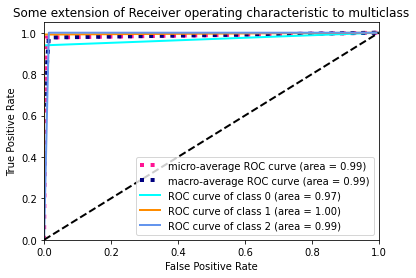

In [ ]:
from itertools import cycle

lw = 2

# First aggregate all false positive rates
n_classes = 3
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test, y_pred, average='micro')
print('Precision: %f' % precision)
recall = recall_score(y_test, y_pred, average='micro')
print('Recall: %f' % recall)
f1 = f1_score(y_test, y_pred, average='micro')
print('F1 score: %f' % f1)

Accuracy: 0.976602
Precision: 0.990201
Recall: 0.976602
F1 score: 0.983355
